In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [2]:
S= "ITC.NS"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("modeldata//"+S+".csv")

In [3]:
df= pd.read_csv("modeldata//"+S+".csv",index_col="Date",parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-04,91.129854,91.206929,89.948267,90.950264,8817182
2010-11-08,92.183473,92.183473,89.717028,90.256561,6954382
2010-11-09,90.436161,91.695593,89.460373,91.361076,6835545
2010-11-10,91.206929,91.669387,90.641957,90.950264,5454314
2010-11-11,91.206922,91.464357,89.742468,90.102417,3753708


In [4]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2462 entries, 2010-11-04 to 2020-11-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2462 non-null   float64
 1   High    2462 non-null   float64
 2   Low     2462 non-null   float64
 3   Close   2462 non-null   float64
 4   Volume  2462 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.4 KB


<AxesSubplot:xlabel='Date'>

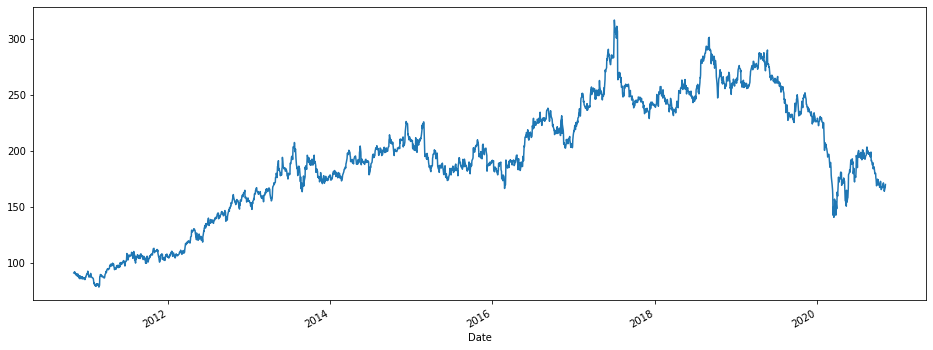

In [6]:
df['Open'].plot(figsize=(16,6))

In [7]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1909, 60, 1)

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1909/1909 [==============================] - 15s 8ms/step - loss: 0.0222
Epoch 2/100
1909/1909 [==============================] - 13s 7ms/step - loss: 0.0040
Epoch 3/100
1909/1909 [==============================] - 12s 6ms/step - loss: 0.0042
Epoch 4/100
1909/1909 [==============================] - 13s 7ms/step - loss: 0.0034
Epoch 5/100
1909/1909 [==============================] - 14s 7ms/step - loss: 0.0036
Epoch 6/100
1909/1909 [==============================] - 12s 6ms/step - loss: 0.0035
Epoch 7/100
1909/1909 [==============================] - 13s 7ms/step - loss: 0.0030
Epoch 8/100
1909/1909 [==============================] - 14s 7ms/step - loss: 0.0032
Epoch 9/100
1909/1909 [==============================] - 14s 7ms/step - loss: 0.0028
Epoch 10/100
1909/1909 [==============================] - 13s 7ms/step - loss: 0.0030
Epoch 11/100
1909/1909 [==============================] - 14s 7ms/step - loss: 0.0029
Epoch 12/100
1909/1909 [==============================] - 14s 8

# Testing

In [16]:
X_test = []
y_test = []
for i in range(60, len(testing_df)):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [17]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
predicted_stock_price = regressor.predict(X_test)

In [19]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(433, 1)

In [20]:
y_test

array([[0.76739254],
       [0.75329896],
       [0.76954558],
       [0.77443911],
       [0.75662662],
       [0.74742672],
       [0.75877968],
       [0.7650436 ],
       [0.75055854],
       [0.7554521 ],
       [0.75525635],
       [0.76308608],
       [0.76230309],
       [0.74351187],
       [0.75623507],
       [0.75095004],
       [0.74977567],
       [0.74546938],
       [0.74723111],
       [0.75134161],
       [0.75643084],
       [0.75310331],
       [0.76700096],
       [0.78657513],
       [0.79323042],
       [0.80732386],
       [0.81789398],
       [0.8218088 ],
       [0.82572356],
       [0.82728947],
       [0.82944283],
       [0.81397912],
       [0.82415775],
       [0.8452978 ],
       [0.84529783],
       [0.83355327],
       [0.8257235 ],
       [0.82180872],
       [0.82220027],
       [0.83355331],
       [0.83511927],
       [0.83746814],
       [0.82963842],
       [0.82591926],
       [0.82435336],
       [0.81593652],
       [0.82983414],
       [0.823

In [21]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [22]:
predicted_stock_price

array([[257.87402],
       [258.82532],
       [258.3281 ],
       [259.4394 ],
       [261.0012 ],
       [259.71707],
       [257.49005],
       [257.73325],
       [259.29343],
       [258.56442],
       [258.17545],
       [258.1682 ],
       [259.1355 ],
       [259.6971 ],
       [257.65298],
       [257.53265],
       [257.47342],
       [257.20947],
       [256.51666],
       [256.2636 ],
       [256.71188],
       [257.62503],
       [257.7223 ],
       [259.12405],
       [262.42288],
       [265.07712],
       [267.70804],
       [270.1934 ],
       [271.7442 ],
       [272.75046],
       [273.34714],
       [273.84006],
       [272.13077],
       [272.22623],
       [275.35077],
       [277.09918],
       [275.83505],
       [273.8222 ],
       [272.51395],
       [272.22955],
       [273.7148 ],
       [274.8184 ],
       [275.38455],
       [274.54623],
       [273.54102],
       [273.02426],
       [271.93646],
       [273.1029 ],
       [273.3531 ],
       [274.2031 ],


In [23]:
actual_stock_price.shape

(433, 1)

In [24]:
predicted_stock_price.shape

(433, 1)

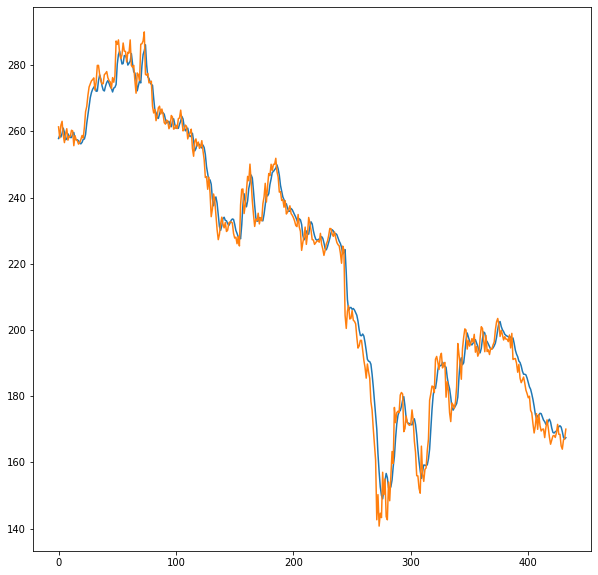

In [25]:
plt.figure(figsize=(10,10))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [26]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

In [27]:
df=df[-433:]
df['Open2']= predicted_stock_price


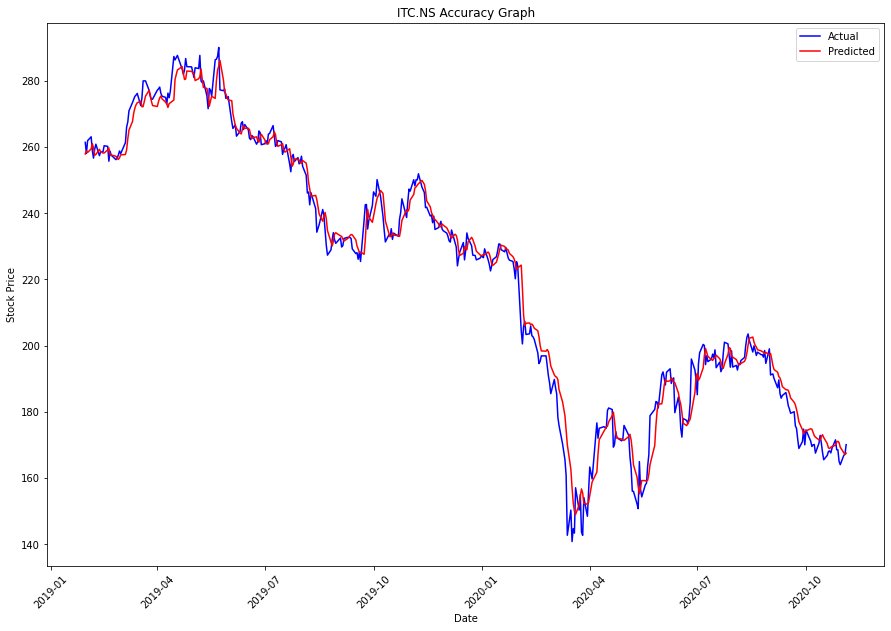

In [34]:
plt.figure(figsize=(15,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph",fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock Price',fontsize=20)
plt.xticks(rotation=45)
plt.legend(['Actual','Predicted'],fontsize=20)
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=14)
plt.savefig("modeldata//"+S+'accuracy_graph.png')

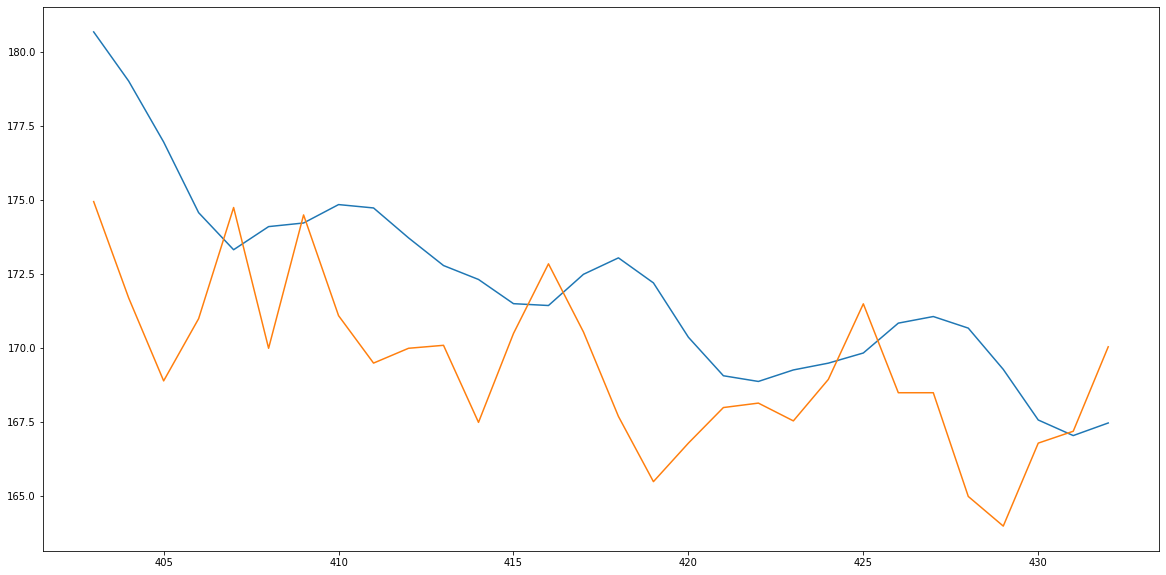

In [35]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [36]:
import pickle
Pkl_Filename = "modeldata//"+S+".pkl"  
sc_file= "modeldata//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)